# Stock Price Prediction for IBM using Recurrent Neural Networks


In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Dividing data into train and test data

In [55]:
df = pd.read_csv('ibm.csv')
training, test = df.iloc[:1056,1:2], df.iloc[1056:,1:2]

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training)

In [57]:
X_train=[]
y_train=[]
for i in range(60,1056):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [58]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Recurrent Neural Network

In [60]:
regressor = Sequential()

In [61]:
regressor.add(LSTM(units=50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [62]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [63]:
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

In [64]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [65]:
regressor.add(Dense(units=1))

In [66]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [67]:
regressor.fit(X_train,y_train,epochs = 100 , batch_size=32)

Epoch 1/100
996/996 [==============================] - 9s 9ms/step - loss: 0.0640

In [102]:
real_stock_price = test.values

In [103]:
df_total = pd.concat((training,test),axis=0)
inputs = df_total[len(df_total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test = []
for i in range(60,513):
    X_test.append(inputs[i-60:i,0])

In [104]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(preedicted_stock_price)

# Actual Vs Predicted IBM Stock Price

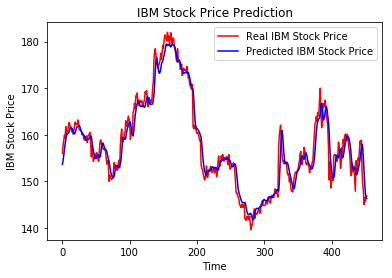

In [105]:
plt.plot(real_stock_price,color='red',label='Real IBM Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()